### AES Encryption Algorithm ECB Mode

In [1]:
import aes_crypt

password = "password123"
message = b"This is a hidden message."

# message = b"""This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message, This is hidden Message
#             """
# message = b"a" * 70000
print(len(message))

aes = aes_crypt.AES_Cipher(key=password, mode="ECB")

ciphertext = aes.encrypt(data=message)

print(f"Original text: {message}")
print(f"Ciphertext: {ciphertext}")


25
Original text: b'This is a hidden message.'
Ciphertext: b'\xf7\x7fsm\x07\xed\xbe\xd9\n\xb5E\xb7\xa0K\x15\x9er\xd7\xc2\x81\xac\xff\x83\xbf\xd5\xbc\xa8\x80]\xa5\xaa\xfc'


In [2]:
decrypted_text = aes.decrypt(ciphertext=ciphertext)

print(f"Decrypted text: {decrypted_text}")


Decrypted text: b'This is a hidden message.'


### Hiding the Encrypted message using LSB Stegnography

In [10]:
import steg
import os

cover_path = os.path.join('images', 'standard', 'cover')
stego_path = os.path.join('images', 'standard', 'stego')
cover_list = [i for i in os.listdir(cover_path) if '.png' in i]
# full_cover_path = ""
# full_stego_path = ""

print(cover_list)


for cover in cover_list:
    stego = "stego_" + cover
    full_cover_path = os.path.join(cover_path, cover)
    full_stego_path = os.path.join(stego_path, stego)
    lsb_steg = steg.Steg(image=full_cover_path, stego=full_stego_path)
    print(str(lsb_steg.get_max_capacity()//8) + " bytes")
    lsb_steg.embed(ciphertext)


['lenna.png', 'pepper.png']
98304 bytes
73728 bytes


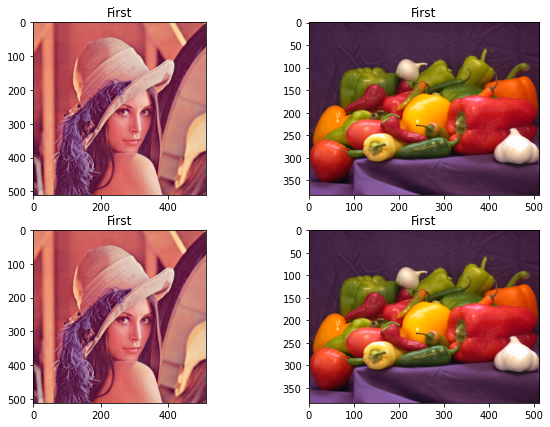

In [10]:
# import matplotlib.pyplot as plt
# import cv2
# # import matplotlib.image as mpimg

# fig = plt.figure(figsize=(10, 7))
# rows, columns = 2, 2

# for i, cover in enumerate(cover_list):
#     img = cv2.imread(os.path.join(cover_path, cover))
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     fig.add_subplot(rows, columns, 1+i)
#     # showing image
#     plt.imshow(img)
# #     plt.axis('off')
#     plt.title("First")
    
# for i, cover in enumerate(cover_list):
#     stego = "stego_" + cover
#     img = cv2.imread(os.path.join(stego_path, stego))
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# #     print(img)
#     fig.add_subplot(rows, columns, 1+i+2)
#     # showing image
#     plt.imshow(img)
# #     plt.axis('off')
#     plt.title("First")


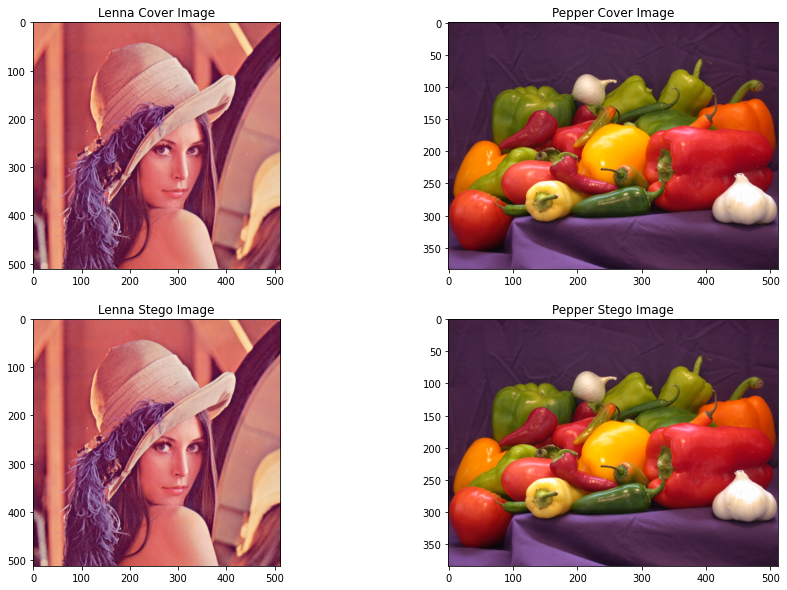

In [4]:
import matplotlib.pyplot as plt
import cv2
# import matplotlib.image as mpimg

fig = plt.figure(figsize=(15, 10))
rows, columns = 2, 2

#show cover images
img = cv2.imread(os.path.join(cover_path, cover_list[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 2, 1)
plt.imshow(img)
plt.title("Lenna Cover Image")
    
img = cv2.imread(os.path.join(cover_path, cover_list[1]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 2, 2)
plt.imshow(img)
plt.title("Pepper Cover Image")


#show stego images
stego = "stego_" + cover_list[0]
img = cv2.imread(os.path.join(stego_path, stego))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 2, 3)
plt.imshow(img)
plt.title("Lenna Stego Image")

stego = "stego_" + cover_list[1]
img = cv2.imread(os.path.join(stego_path, stego))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig.add_subplot(2, 2, 4)
plt.imshow(img)
# plt.axis('off')
plt.title("Pepper Stego Image")

print(end="")


### Encrypting the Stego Image

In [7]:
stego = "stego_" + cover_list[0]
full_stego_path = os.path.join(stego_path, stego)
with open(full_stego_path, 'rb') as f:
    img_data = f.read()
    
encrypted_image = aes.encrypt(img_data)

# print(encrypted_image)
decrypted_image = aes.decrypt(encrypted_image)
with open('test.png', 'wb') as f:
    f.write(decrypted_image)
    
if img_data == decrypted_image:
    print('ok')

ok


### PSNR And MSE Results

In [8]:
import psnr_mse as pm
import cv2

for cover in cover_list:
    stego = "stego_" + cover
    full_cover_path = os.path.join(cover_path, cover)
    full_stego_path = os.path.join(stego_path, stego)
#     print(full_cover_path, full_stego_path)
    original = cv2.imread(full_cover_path)
    stego_img = cv2.imread(full_stego_path)
    res_psnr = pm.PSNR(original, stego_img)
    res_mse = pm.MSE(original, stego_img)
    print("MSE:", res_mse)
    print("PSNR:", res_psnr)


MSE: 5.7220458984375e-05
PSNR: 90.5552902376389
MSE: 0.00029669867621527775
PSNR: 83.4076475224464


In [27]:
import aes_crypt
import steg
import psnr_mse as pm

password = "abc123"
message = b"This is a hidden message."
letters = b"abcdefghijklmnopqrstuvwxyz1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZ"
letter = b"a"
msg_len_list = [10, 20, 50, 100, 1000, 2000, 5000, 10000, 20000, 50000]

aes = aes_crypt.AES_Cipher(key=password, mode="ECB")
ciphertext = aes.encrypt(data=message)
print(len(message))

abc = []
for cover in cover_list:
    psnr_list1 = []
    mse_list1 = []
    stego = "stego_" + cover
    full_cover_path = os.path.join(cover_path, cover)
    full_stego_path = os.path.join(stego_path, stego)
    lsb_steg = steg.Steg(image=full_cover_path, stego=full_stego_path)
    max_len = lsb_steg.get_max_capacity() // 8
#     for i in range (1, max_len-30, 1000):
    for i in msg_len_list:
        msg = letter*i
        lsb_steg.embed(msg)
#         res = pm.PSNR(full_cover_path, full_stego_path)
        original = cv2.imread(full_cover_path)
        stego_img = cv2.imread(full_stego_path)
        res_psnr = pm.PSNR(original, stego_img)
        res_mse = pm.MSE(original, stego_img)
#         print(res)
        psnr_list1.append(res_psnr)
        mse_list1.append(res_mse)
    abc.append([mse_list1, psnr_list1])
    
#     lsb_steg.embed(ciphertext)
# print(psnr_list1)
# print(mse_list1)
print(abc[0])

25
[[0.000102996826171875, 0.000148773193359375, 0.0003000895182291667, 0.0005734761555989584, 0.005330403645833333, 0.010480244954427084, 0.025786081949869793, 0.05125554402669271, 0.1022809346516927, 0.25593821207682294], [88.00256518660584, 86.40555675793073, 83.35829534569127, 80.54564995661273, 70.86320263563564, 67.92708927350665, 64.01695002321216, 61.033395133844195, 58.03285672876362, 54.049452291222266]]


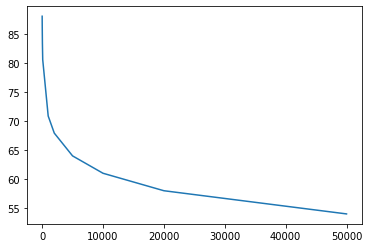

In [25]:
import matplotlib.pyplot as plt

plt.plot(msg_len_list, psnr_list1)
plt.show()

# figure, axis = plt.subplots(1, 2)
# axis[0].plot(msg_len_list, psnr_list1)
# axis[0].set_title('hello')
# axis[1].plot(msg_len_list, mse_list1)
# axis[1].set_title('hello1')
# plt.show()

In [14]:
img1 = os.path.join(cover_path, cover_list[0])
img2 = os.path.join(stego_path, "stego_"+cover_list[0])
print('hi')
#cv2.imread(img1)

hi


In [20]:
#cv2.imread(img2)